<a href="https://colab.research.google.com/github/wilberever100/DataCompressionHuffman/blob/main/CBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# File creation

In [ ]:
import os
import random
fileGroup = {'small': [150, 300, 500, 700, 1000],  # smallFiles
            'medium': [2e+4, 3e+4, 5e+4, 7e+4, 1e+5],  # mediumFiles
            'large': [2e+8, 3e+8, 5e+8, 7e+8, 1e+9]}  # BigFiles

! rm /content/small*.txt
! rm /content/medium*.txt
! rm /content/large*.txt
print(fileGroup["medium"][0])
path_name="/content/libro.txt"
for key in fileGroup:
    for idx, fileSize in enumerate(fileGroup[key]):
        fileName = "/content/" + key + "text" + str(idx) + ".txt"
        # Remove original file if exists
        

        fileSize=int(fileSize)

        
        # Creates random generator file
        with open(fileName, "wb") as txtfile:
            with open(path_name, 'rb') as f:
                words=f.read()[:fileSize]
                # print((words.__sizeof__))
                txtfile.write(words)

        stats = os.stat(fileName)
        if key == "small":
            print(fileName, "file created:",
                stats.st_size, "bytes")
        elif key == "medium":
            print(fileName, "file created:",
                stats.st_size / 1e3, "KB")
        else:
            print(fileName, "file created:",
                stats.st_size / 1e6, "MB")
            # print(fileName, "file created:", os.path.getsize(fileName), "bytes")

20000.0
/content/smalltext0.txt file created: 150 bytes
/content/smalltext1.txt file created: 300 bytes
/content/smalltext2.txt file created: 500 bytes
/content/smalltext3.txt file created: 700 bytes
/content/smalltext4.txt file created: 1000 bytes
/content/mediumtext0.txt file created: 20.0 KB
/content/mediumtext1.txt file created: 30.0 KB
/content/mediumtext2.txt file created: 50.0 KB
/content/mediumtext3.txt file created: 70.0 KB
/content/mediumtext4.txt file created: 100.0 KB
/content/largetext0.txt file created: 0.306523 MB
/content/largetext1.txt file created: 0.306523 MB
/content/largetext2.txt file created: 0.306523 MB
/content/largetext3.txt file created: 0.306523 MB
/content/largetext4.txt file created: 0.306523 MB


# Huffman

In [ ]:
# A Huffman Tree Node
import re
from string import punctuation
import time


class Node:
    def __init__(self, prob, symbol, left=None, right=None):

        # probability of symbol
        self.prob = prob

        # symbol
        self.symbol = symbol

        # left node
        self.left = left

        # right node
        self.right = right

        # tree direction (0/1)
        self.code = ''


""" A helper function to print the codes of symbols by traveling Huffman Tree"""
# codes = dict()

#maxPercentage, currentPercentage, total_words = 0, 0, 0


class HuffmanCompression:

    def __init__(self):
        self.codes = dict()

    def Calculate_Codes(self, node, val=''):
        # huffman code for current node
        newVal = val + str(node.code)

        if(node.left):
            self.Calculate_Codes(node.left, newVal)
        if(node.right):
            self.Calculate_Codes(node.right, newVal)

        if(not node.left and not node.right):
            prob = (1 / self.total_words) * 100  # 10
            self.currentPercentage += prob

            if self.maxPercentage >= round(self.currentPercentage, 2):
                self.codes[node.symbol] = newVal  # 0100110
            else:
                self.codes[node.symbol] = node.symbol  # fox

        return self.codes

    """ A helper function to calculate the probabilities of symbols in given data"""

    def Calculate_Probability(self, data):
        symbols = dict()
        # Separar por espacios
        words = re.findall(r"\w+|[^\w\s]", data, re.UNICODE)
        punc = []  # value, index           Símbolos especiales

        # matrix = [["?", 1], ["(", 4]]
        for idx, word in enumerate(words):
            # for word,i in words:
            if word in set(punctuation):
                punc.append([word, idx])
                continue

            if symbols.get(word) == None:
                symbols[word] = 1
            else:
                symbols[word] += 1

        self.total_words = len(symbols)
        return symbols, words, punc

    def isUniqueOnKeys(self, word, keys, idx):
        fullMatch = False  # Boolean to check for full word match
        return word in keys


    """ A helper function to obtain the encoded output"""

    def Output_Encoded(self, words, coding, punc):
        huffmanEncoded = ""

        keys = list(coding.keys())

        # for word in words:
        jointWord = ""
        for idx, c in enumerate(self.data):
            if c == " " or c == "\n" or c in set(punctuation):
                if self.isUniqueOnKeys(jointWord, keys, idx):
                    huffmanEncoded += coding[jointWord]
                    jointWord = ""
                else:
                    huffmanEncoded += jointWord
                    jointWord = ""

                huffmanEncoded += c
            else:
                jointWord += c

        if len(jointWord):
            if self.isUniqueOnKeys(jointWord, keys, idx):
                huffmanEncoded += coding[jointWord]
                jointWord = ""
            else:
                huffmanEncoded += jointWord
                jointWord = ""

        return huffmanEncoded

    """ A helper function to calculate the space difference between compressed and non compressed data"""

    def Total_Gain(self, data, coding):
        # total bit space to stor the data before compression
        self.before_compression = len(data) * 8
        self.after_compression = 0
        symbols = coding.keys()
        for symbol in symbols:
            count = data.count(symbol)
            # calculate how many bit is required for that symbol in total
            self.after_compression += count * len(coding[symbol])

        # print("Huffman Space usage before compression (in bits):", self.before_compression)
        # print("Huffman Space usage after compression (in bits):",  self.after_compression)
        # print("Compression:", self.after_compression / self.before_compression)

        # print()

    def Huffman_Encoding(self, data, percentage=100):
        startTime = time.time()
        self.data = data
        self.maxPercentage, self.currentPercentage = percentage, 0
        symbol_with_probs, words, punc = self.Calculate_Probability(data)

        symbols = symbol_with_probs.keys()
        probabilities = symbol_with_probs.values()

        nodes = []

        # converting symbols and probabilities into huffman tree nodes
        for symbol in symbols:
            nodes.append(Node(symbol_with_probs.get(symbol), symbol))

        while len(nodes) > 1:
            # sort all the nodes in ascending order based on their probability
            nodes = sorted(nodes, key=lambda x: x.prob)

            # pick 2 smallest nodes
            right = nodes[0]
            left = nodes[1]

            left.code = 0
            right.code = 1

            # combine the 2 smallest nodes to create new node
            newNode = Node(left.prob+right.prob, left.symbol +
                           right.symbol, left, right)

            nodes.remove(left)
            nodes.remove(right)
            nodes.append(newNode)

        huffman_encoding = self.Calculate_Codes(nodes[0])
        # Gain of compressed vs decompressed

        self.Total_Gain(data, huffman_encoding)
        encoded_output = self.Output_Encoded(words, huffman_encoding, punc)
        endTime = time.time()

        return encoded_output, nodes[0], endTime - startTime

    def find_code(self, word, huffman_tree):
        tree_head = huffman_tree
        decoded_output = []
        word_formed = ""
        for x in word:
            if x == '1':
                word_formed += "1"
                huffman_tree = huffman_tree.right
            elif x == '0':
                word_formed += "0"
                huffman_tree = huffman_tree.left
            try:
                if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                    pass
            except AttributeError:
                decoded_output.append(word_formed)
                word_formed = ""
                huffman_tree = tree_head

        return decoded_output

    def Huffman_Decoding(self, encoded_data, huffman_tree):
        tree_head = huffman_tree
        decoded_output = []
        not_encoded_word = ""
        for x in encoded_data:
            if x == '1':
                huffman_tree = huffman_tree.right
            elif x == '0':
                huffman_tree = huffman_tree.left
            elif x in set(punctuation):  # Para añadir puntuaciones
                if not_encoded_word:
                    decoded_output.append(not_encoded_word)
                    not_encoded_word = ""

                decoded_output.append(x)
            else:  # non encoded word
                not_encoded_word += x

            try:
                if huffman_tree.left.symbol == None and huffman_tree.right.symbol == None:
                    pass
            except AttributeError:
                if not_encoded_word:
                    decoded_output.append(not_encoded_word)
                    not_encoded_word = ""

                decoded_output.append(huffman_tree.symbol)
                huffman_tree = tree_head

        string = ''.join([str(item) for item in decoded_output])
        return string

# CDC

## Libraries and setup

In [ ]:
from re import sub
import os
import time

huffmanObj = HuffmanCompression()
punc_positions = []
symbols_positions = []

## Decompression

In [ ]:

def decompression(encoded, symbols, tree):
    # print("########################################")
    # print("Decompression")
    # Part 1: Decoding CDC
    cdcDecoded = ""
    keys = list(symbols.keys())  # lista de binarios [01100110, ...]
    values = list(symbols.values())  # [hexa, count]
    sym = []
    for en in values:
        sym.append(en[0])

    checkForWord = ""
    for idxEncoded, c in enumerate(encoded):
        if c == "\n":
            cdcDecoded += '\n'
            continue
        if c == " ":
            cdcDecoded += " "
            continue
        checkForWord += c

        # a la hora comprimir
        # guardar posiciones

        # hola como 0001 1000stas      0001 1000
        if checkForWord in set(punctuation):
            if idxEncoded in punc_positions:
                cdcDecoded += checkForWord
                checkForWord = ""
            else:
                # for por cada valor codificado
                for idxValues, en in enumerate(values):
                    if checkForWord == en[0]:  # match de word codificado
                        # Ü = ["1101", "1100"]
                        huffmanEncoded = huffmanObj.find_code(
                            keys[idxValues], tree)

                        # "Word padded with zeroes, removing...
                        prov = en[1]
                        if en[1] == 0:
                            prov = 1
                        while len(huffmanEncoded) > prov:  # en[1] == count
                            huffmanEncoded.pop(0)

                        if en[1] == 0:
                            # une mediante espacios el huffmanEncoded
                            cdcDecoded += ''.join([str(item)
                                                   for item in huffmanEncoded])
                        else:
                            cdcDecoded += ' '.join([str(item)
                                                    for item in huffmanEncoded])

                        # añadir un espacio si existe dos palabras comprimidas juntas
                        # if (encoded[idxEncoded + 1] != " " or encoded[idxEncoded + 1] != "\n") and not encoded[idxEncoded + 1] in set(punctuation):
                        #     cdcDecoded = cdcDecoded + " "
                        checkForWord = ""
                        break

        else:
            # for por cada valor codificado
            found = False
            for idxValues, en in enumerate(values):

                # Si la palabra comprimida no coincide, pegar tal cual
                if not idxEncoded in symbols_positions:
                    cdcDecoded += checkForWord
                    checkForWord = ""
                    found = True
                    break

                if checkForWord == en[0]:  # match de word codificado

                    # Ü = ["1101", "1100"]
                    huffmanEncoded = huffmanObj.find_code(
                        keys[idxValues], tree)

                    # "Word padded with zeroes, removing...
                    while len(huffmanEncoded) > en[1]:  # en[1] == count
                        huffmanEncoded.pop(0)

                    # une mediante espacios el huffmanEncoded
                    cdcDecoded += ' '.join([str(item)
                                           for item in huffmanEncoded])
                    # añadir un espacio si existe dos palabras comprimidas juntas
# 'Ü \x0b, © \x87 e\nC ! \x07. :)\n:('

                    checkForWord = ""
                    found = True
                    break
            if not found:
                cdcDecoded += checkForWord
                checkForWord = ""

    # print("cdcDecoded:", cdcDecoded)

    # Part 2: Decoding Huffman

    huffmanDecoded = huffmanObj.Huffman_Decoding(cdcDecoded, tree)

    return huffmanDecoded

    # print()


## Compression

In [ ]:
def partial_compression(data="Hi, how (are)- you?", percentage=90):
    # Huffman con percentage
    symbols = dict()

    # 11,10.01-00?
    text_encoded, tree, _ = huffmanObj.Huffman_Encoding(
        data, percentage)

    count = 0  # Contador para el numero de palabras
    partialEncoded = ""  # Para verificar si es comprimida
    cdcEncoding = ""  # Parte comprimida
    checkForWord = ""  # Para ir avanzando por el texto
    # punc_positions = []  # Posiciones de las puntuaciones
    start = time.time()
    for idx, c in enumerate(text_encoded):
        if c == " ":
            continue

        checkForWord += c
        partialEncoded += c

        # Verificar si es palabra comprimida
        if c == "0" or c == "1":
            # si es palabra comprimida y luego tiene 0s 1s   -> "hola 0101"
            if len(checkForWord) >= 2:
                if checkForWord[-2] != "0" and checkForWord[-2] != "1":
                    cdcEncoding += checkForWord[:-1]
                    checkForWord = c
                    partialEncoded = c

            # Contador para verificar al descomprimir cuantos
            if idx + 1 != len(text_encoded) and not text_encoded[idx + 1] in ["0", "1"] and isEncodedWord(partialEncoded):
                count += 1

                partialEncoded = ""

            # encode checkForWord
            if len(checkForWord) == 8:
                binary = checkForWord.zfill(8)  # rellenar con 0s
                x = chr(int(binary, 2))
                symbols_positions.append(len(cdcEncoding))

                cdcEncoding += x  # guarda los encodings cuando llegan a 8 bits
                if idx + 1 != len(text_encoded) and text_encoded[idx + 1] == " ":
                    cdcEncoding += " "

                symbols[binary] = [x, count, 8 - len(checkForWord)]
                count = 0
                checkForWord = ""
                partialEncoded = ""

      # si encuentra puntuacion
      # verificar el indice en algun simbolo
        elif c in set(punctuation) or c == '\n':
            if len(checkForWord) >= 2:
                if checkForWord[-2] != "0" and checkForWord[-2] != "1":
                    checkForWord = checkForWord[:-1]
                    cdcEncoding += checkForWord
                    checkForWord = ""
                    partialEncoded = ""
                else:
                    checkForWord = checkForWord[:-1]
                    binary = checkForWord.zfill(8)
                    x = chr(int(binary, 2))  # 000000Hi
                    # add to CDC symbols
                    symbols[checkForWord] = [
                        x, count, 8 - len(checkForWord)]

                    checkForWord = ""
                    partialEncoded = ""
                    count = 0

                    symbols_positions.append(len(cdcEncoding))
                    cdcEncoding += x
                    if text_encoded[idx - 1] == " ":
                        cdcEncoding += " "

            punc_positions.append(len(cdcEncoding))
            cdcEncoding = cdcEncoding + c
            if idx + 1 != len(text_encoded) and text_encoded[idx + 1] == " ":
                cdcEncoding += " "

            checkForWord = ""
            partialEncoded = ""

        else:  # Ejm: 00011 hola
            if len(checkForWord) >= 2: # Ejm: 00011 hola
                # palabra no comprimida
                # Ejm: ho1
                if checkForWord[-2] != "0" and checkForWord[-2] != "1":  # si es letra u otro
                    cdcEncoding += checkForWord
                    checkForWord = ""
                    partialEncoded = ""
                    if idx + 1 != len(text_encoded) and text_encoded[idx + 1] == " ":
                        cdcEncoding += " "

                else:  # palabra comprimida Ejm: "0101h"
                    checkForWord = checkForWord[:-1]
                    binary = checkForWord.zfill(8)  # rellenar con 0s
                    x = chr(int(binary, 2))
                    symbols_positions.append(len(cdcEncoding))
                    cdcEncoding += x  # guarda los encodings cuando llegan a 8 bits
                    partialEncoded = ""
                    if idx - 1 != len(text_encoded) and text_encoded[idx - 1] == " ":
                        cdcEncoding += " "

                    symbols[checkForWord] = [
                        x, count, 8 - len(checkForWord)]
                    count = 0
                    checkForWord = c
                    partialEncoded = c
            else:  # copiar palabra no comprimida
                cdcEncoding += checkForWord
                checkForWord = ""
                partialEncoded = ""

                if idx + 1 != len(text_encoded) and text_encoded[idx + 1] == " ":
                    cdcEncoding += " "

    end = time.time()
    # print("Time inside:",end-start)
    if len(checkForWord):
        binary = checkForWord.zfill(8)  # rellenar con 0s

        x = chr(int(binary, 2))
        symbols_positions.append(len(cdcEncoding))
        cdcEncoding += x  # guarda los encodings cuando llegan a 8 bits

        # add to CDC symbols      de la forma   011 10 010=k  =>      [k, 3]
        symbols[checkForWord] = [x, count, 8 - len(checkForWord)]
        checkForWord = ""


    return cdcEncoding, symbols, tree

## Utils

In [ ]:
def isEncodedWord(word):
    isInValues = word in huffmanObj.codes.values()     # es una palabra sin codificar?
    # no es una palabra dentro del diccionario?
    isNotInKeys = not word in huffmanObj.codes

    # no es un signo de puntuación?
    isNotPuntuation = not word in set(punctuation)
    return (isInValues and isNotInKeys) and isNotPuntuation

    
def Total_Gain(data, coding):
    # total bit space to store the data before compression
    before_compression = len(data) * 8
    after_compression = len(coding) * 8
    # print("Space usage before compression (in bits):", before_compression)
    # print("Space usage after compression (in bits):",  after_compression)
    # print("Compression:", after_compression / before_compression)
    return before_compression, after_compression


def execute(data, percentage=100):
    startEncoding = time.time()
    cdcEncoding, symbols, tree = partial_compression(
        data, percentage=percentage)  # Hi,how.01-00?
    endEncoding = time.time()

    before, after = Total_Gain(data, cdcEncoding)

    compression_rate = after / before

    return cdcEncoding, compression_rate, endEncoding - startEncoding


# Plot graphs

## Plot def

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os


def plotGraphs(reduced_sizes, percentage, labels):
    # reduced_sizes: array of numpy arrays(every element has an array of size of a reduced file)
    reduced_sizes = np.array(reduced_sizes)
    n_groups = len(reduced_sizes)
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 0.8

    colors = ['#4f81bc', '#c0504d', '#9cba5b', '#8063a1', '#4aacc5']

    print("len(reduced_sizes)   : ", len(reduced_sizes))
    for idx2 in range(len(reduced_sizes)):
        # print("SHAPE: ", reduced_sizes[idx2].shape)
        # print("ELEMENTS: ", reduced_sizes[idx2])

        plt.bar(index + idx2 * bar_width, reduced_sizes[idx2], bar_width,
                alpha=opacity,
                color=colors[idx2],
                label=labels[idx2])

    plt.xlabel('Methods')
    plt.ylabel('Compression Rate')
    if key == "small":
        plt.title(
            'Comparison of Compression Ratio of Different Algorithms (Very Small Size File)')
    elif key == "medium":
        plt.title(
            'Comparison of Compression Ratio of Different Algorithms (Small Size File)')
    else:
        plt.title(
            'Comparison of Compression Ratio of Different Algorithms (Large Small Size File)')

    plt.xticks(index + bar_width, percentage)
    plt.legend()

    plt.tight_layout()
    plt.show()



## Execution

Running file 1
Time: 22.008870840072632 s
Running file 2
Time: 22.213172435760498 s
Running file 3
Time: 21.89875340461731 s
Running file 4
Time: 21.652926445007324 s
Running file 5
Time: 22.130953788757324 s
Compression testing: 50
File 1:  24.083404302597046 s
File 2:  24.24552869796753 s
File 3:  24.160632371902466 s
File 4:  24.241546869277954 s
File 5:  24.137322902679443 s
Compression testing: 70
File 1:  25.039116144180298 s
File 2:  24.65721845626831 s
File 3:  25.195040464401245 s
File 4:  24.845961093902588 s
File 5:  24.724360942840576 s
Compression testing: 90
File 1:  30.27006435394287 s
File 2:  29.980576992034912 s
File 3:  29.902007579803467 s
File 4:  29.975908994674683 s
File 5:  29.925514698028564 s
Compression testing: 100
File 1:  35.081303358078 s
File 2:  34.86182141304016 s
File 3:  34.982024908065796 s
File 4:  35.06062126159668 s
File 5:  35.170981645584106 s

Huffman: 22.131 s 2.132
CBC-50%: 24.174 s 0.892
CBC-70%: 24.892 s 0.842
CBC-90%: 30.011 s 0.616
CBC-1

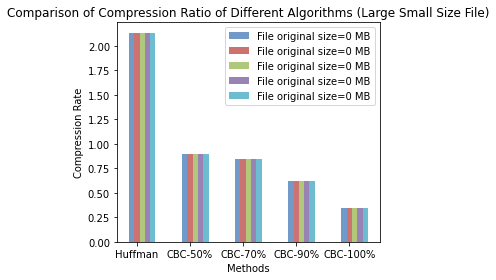

In [ ]:

# call execute on each file
compressions = [50, 70, 90, 100]

# Table 1 data
compression_rate = []
encodingTimes_general = []
encodingTimes = []
file_data = []
labels = []

key = "medium"

if key == "small":
    sizeTerm = "Bytes"
elif key == "medium":
    sizeTerm = "KB"
else:
    sizeTerm = "MB"


compression_rate_general = []
compression_rate = [[],[],[],[],[]]

# Add HUFFMAN
for i in range(5):
    fileName = "/content/" + key + "text" + str(i) + ".txt"
    f = open(fileName, "r")
    data = f.read()
    reduced = []
    compreoriginal = []
    encodingTimes = []

    print("Running file", i+1)

    text_encoded, tree, encodingTime = huffmanObj.Huffman_Encoding(data)
    compression_rate[i].append(float(
         huffmanObj.after_compression) / float(huffmanObj.before_compression))
    # compression_rate.append(float(
    #     huffmanObj.after_compression) / float(huffmanObj.before_compression))

    compression_rate_general.append(float(
        huffmanObj.after_compression) / float(huffmanObj.before_compression))
    
    print("Time:", str(encodingTime)+" s")

    encodingTimes.append(encodingTime)

    compreoriginal.append(huffmanObj.before_compression)
    reduced.append(huffmanObj.after_compression)

file_data.append(compression_rate_general)
encodingTimes_general.append(encodingTimes)

for idx, c in enumerate(compressions):
    reduced = []
    compreoriginal = []
    encodingTimes = []
    compression_rate_general = []
    print("Compression testing: " + str(c))
    for i in range(5):
        fileName = "/content/" + key + "text" + str(i) + ".txt"
        
        fileSize = os.path.getsize(fileName)
        if key == "small":
          fileSize = fileSize
        if key == "medium":
          fileSize = fileSize / 1e3
        else:
          fileSize = fileSize / 1e6
        if idx == 0:
            if key == "small":
                sizesss = [150,300,500,700,1000]
                labels.append("File original size=" +
                          str(sizesss[i]) + " " + sizeTerm)
            else:
                labels.append("File original size=" +
                            str(int(fileSize)) + " " + sizeTerm)

        f = open(fileName, "r")
        data = f.read()

        cdcEncoding, com_rate, encodingTime = execute(data, c)
        print("File "+str(i+1)+": ", str(encodingTime)+" s")

        # Data for table 1
        compression_rate[i].append(com_rate)
        compression_rate_general.append(com_rate)
        encodingTimes.append(encodingTime)

        # Data for bar plot
        original_size, compressed_size = Total_Gain(data, cdcEncoding)
        compreoriginal.append(original_size)
        reduced.append(compressed_size)
        # print("result: ",cdcEncoding,"\ncompression: ", com_rate)
        punc_positions = []
        symbols_positions = []

    file_data.append(compression_rate_general)
    encodingTimes_general.append(encodingTimes)


# Table 1
for i in range(len(compressions)):
    compressions[i] = "CBC-" + str(compressions[i]) + "%"

compressions.insert(0, "Huffman")

print()
for idx in range(len(compressions)):
    print(compressions[idx] + ":",
           round(np.sum(encodingTimes_general[idx]) / len(encodingTimes_general[idx]), 3), "s", 
          round(np.sum(file_data[idx]) / len(file_data[idx]), 3))

# Plot graphs

plotGraphs(compression_rate, compressions, labels)


In [ ]:
# key = "large"
# for i in range(5):
#     fileName = "/content/" + key + "text" + str(i) + ".txt"
    
#     fileSize = os.path.getsize(fileName)
#     fileSize = fileSize / 1e6

#     f = open(fileName, "r")
#     data = f.read()

#     cdcEncoding, com_rate, encodingTime = execute(data, 100)
#     print("File "+str(i+1)+": ", str(encodingTime)+" s")


In [ ]:
# [0.5593407154083252, 1.8874309062957764, 6.183732986450195, 14.76938271522522, 33.41586446762085]
# 100.0
# Compression testing: 50
# File 1:  7.14636492729187 s
# File 2:  9.776684045791626 s
# File 3:  16.501352071762085 s
# File 4:  24.09726095199585 s
# File 5:  35.77982807159424 s
# 100.0
# Compression testing: 70
# File 1:  7.523942947387695 s
# File 2:  10.46938443183899 s
# File 3:  16.610485076904297 s
# File 4:  24.58801817893982 s
# File 5:  34.531208992004395 s
# 100.0
# Compression testing: 90
# File 1:  6.742914438247681 s
# File 2:  9.936888694763184 s
# File 3:  16.541645526885986 s
# File 4:  23.71052885055542 s
# File 5:  33.98650765419006 s
# 100.0
# Compression testing: 100
# File 1:  6.610947847366333 s
# File 2:  9.71613335609436 s
# File 3:  16.87104296684265 s
# File 4:  23.52297806739807 s
# File 5:  34.14159822463989 s
# Huffman: 0.559 s 0.822
# CBC-50%: 1.887 s 1.335
# CBC-70%: 6.184 s 1.391
# CBC-90%: 14.769 s 1.626
# CBC-100%: 33.416 s 1.71
# len(reduced_sizes)   :  5

In [ ]:
# Compression testing: 50
# Huffman Space usage before compression (in bits): 156304
# Huffman Space usage after compression (in bits):  154869
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits):  129120
# File 1:  0.4848020076751709 s
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits):  129120
# Huffman Space usage before compression (in bits): 234656
# Huffman Space usage after compression (in bits):  317690
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 129936
# File 2:  0.9887261390686035 s
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 129936
# Huffman Space usage before compression (in bits): 391880
# Huffman Space usage after compression (in bits): 460812
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 278864
# File 3:  1.5399436950683594 s
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 278864
# Huffman Space usage before compression (in bits): 548672
# Huffman Space usage after compression (in bits): 614115
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 388056
# File 4:  2.337441921234131 s
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 388056
# Huffman Space usage before compression (in bits): 784040
# Huffman Space usage after compression (in bits): 851208
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 555368
# File 5:  3.5186922550201416 s
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 555368
# Compression testing: 70
# Huffman Space usage before compression (in bits): 156304
# Huffman Space usage after compression (in bits): 144781
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits): 117640
# File 1:  0.5301756858825684 s
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits): 117640
# Huffman Space usage before compression (in bits): 234656
# Huffman Space usage after compression (in bits): 317924
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 112112
# File 2:  1.0713210105895996 s
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 112112
# Huffman Space usage before compression (in bits): 391880
# Huffman Space usage after compression (in bits): 471562
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 255928
# File 3:  1.691270351409912 s
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 255928
# Huffman Space usage before compression (in bits): 548672
# Huffman Space usage after compression (in bits): 751616
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 228024
# File 4:  2.9060888290405273 s
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 228024
# Huffman Space usage before compression (in bits): 784040
# Huffman Space usage after compression (in bits): 932353
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 519080
# File 5:  3.6374802589416504 s
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 519080
# Compression testing: 90
# Huffman Space usage before compression (in bits): 156304
# Huffman Space usage after compression (in bits): 163416
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits): 86576
# File 1:  0.684988260269165 s
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits): 86576
# Huffman Space usage before compression (in bits): 234656
# Huffman Space usage after compression (in bits): 335859
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 93056
# File 2:  1.1333541870117188 s
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 93056
# Huffman Space usage before compression (in bits): 391880
# Huffman Space usage after compression (in bits): 529448
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 217200
# File 3:  1.7510080337524414 s
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 217200
# Huffman Space usage before compression (in bits): 548672
# Huffman Space usage after compression (in bits): 840377
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 194712
# File 4:  3.0272457599639893 s
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 194712
# Huffman Space usage before compression (in bits): 784040
# Huffman Space usage after compression (in bits): 1035077
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 445288
# File 5:  3.7603604793548584 s
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 445288
# Compression testing: 100
# Huffman Space usage before compression (in bits): 156304
# Huffman Space usage after compression (in bits):  229361
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits):   48840
# File 1:  0.7594718933105469 s
# Space usage before compression (in bits): 156304
# Space usage after compression (in bits): 48840
# Huffman Space usage before compression (in bits): 234656
# Huffman Space usage after compression (in bits): 353581
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 74736
# File 2:  1.1915607452392578 s
# Space usage before compression (in bits): 234656
# Space usage after compression (in bits): 74736
# Huffman Space usage before compression (in bits): 391880
# Huffman Space usage after compression (in bits): 605170
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 125776
# File 3:  2.0280399322509766 s
# Space usage before compression (in bits): 391880
# Space usage after compression (in bits): 125776
# Huffman Space usage before compression (in bits): 548672
# Huffman Space usage after compression (in bits): 851826
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 177496
# File 4:  3.0820658206939697 s
# Space usage before compression (in bits): 548672
# Space usage after compression (in bits): 177496
# Huffman Space usage before compression (in bits): 784040
# Huffman Space usage after compression (in bits): 1234961
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 254000
# File 5:  4.430123805999756 s
# Space usage before compression (in bits): 784040
# Space usage after compression (in bits): 254000
# Huffman: 0.268 s 0.955
# CBC-50%: 0.503 s 1.048
# CBC-70%: 0.976 s 1.141
# CBC-90%: 1.563 s 1.324
# CBC-100%: 2.584 s 1.575
# len(reduced_sizes)   :  5